In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
DIMENSION = 2 # отвечает за размерность точек
HOWMANYDOTS = 50 # отвечает за количество точек
BEGININTERVAL, ENDINTERVAL = 0.0, 5.0 # отвечает за разброс точек в интервале
try:
    if BEGININTERVAL > ENDINTERVAL:
        BEGININTERVAL, ENDINTERVAL = ENDINTERVAL, BEGININTERVAL
    elif BEGININTERVAL == ENDINTERVAL:
        raise ValueError('The same begin and end of interval.')
except Exception as ex:
    print(str(ex) + " Change interval and try again")

In [3]:
def K_means(x, k):
    X = [[] for i in range(len(k))]
    
    for i in x:
        min_dist = (ENDINTERVAL - BEGININTERVAL) ** 2
        index = 0
        iter_ = 0 # костыль №1
        for j in k:
            diff = (i - j) ** 2
            sum_ = np.sum(diff)
            if sum_ < min_dist:
                min_dist = sum_
                index = iter_
            iter_ += 1
        X[index].append(i)  

    iter_ = 0 # костыль №2
    new_k = [] # костыль №3
    
    for i in X:
        C = len(i)
        if C == 0:
            new_k.append(k[iter_])
        else:
            sum_ = np.linspace(0.0, 0.0, DIMENSION)
            for j in i:
                sum_ += j
            new_k.append(sum_ / C)
        iter_ += 1
    
    new_k = np.array(new_k) #костыль №3
    
    if (k==new_k).all():
        return X, k
    return K_means(x, new_k)

In [4]:
x_arr = ENDINTERVAL * np.random.sample((HOWMANYDOTS, DIMENSION)) + BEGININTERVAL

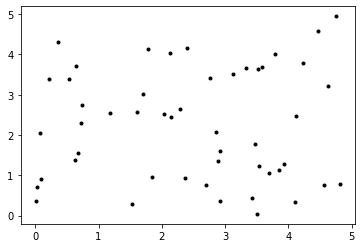

In [5]:
for i in x_arr:
    x = i[0]
    y = i[1]
    plt.plot(x, y, ".k")
plt.show()

In [6]:
k = np.random.randint(1, HOWMANYDOTS) # отвечает за количество центров - можно зафиксировать
k_arr = x_arr[np.random.randint(0, HOWMANYDOTS, k)]
print("выбрали центров - " +str(len(k_arr)))

выбрали центров - 3


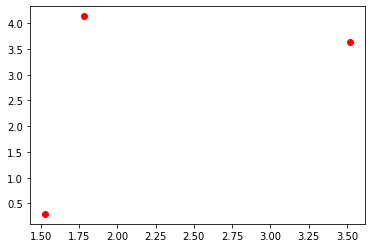

In [7]:
for i in k_arr:
    x = i[0]
    y = i[1]
    plt.plot(x, y, "or")
plt.show()

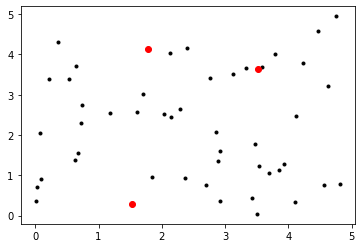

In [8]:
for i in x_arr:
    x = i[0]
    y = i[1]
    plt.plot(x, y, ".k")
for i in k_arr:
    x = i[0]
    y = i[1]
    plt.plot(x, y, "or")
plt.show()

In [9]:
X, k_arr = K_means(x_arr, k_arr)

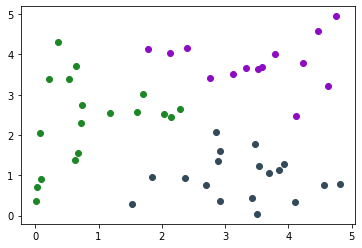

<Figure size 2880x2880 with 0 Axes>

In [10]:
for i in X:
    col = (random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))
    for j in i:
        x = j[0]
        y = j[1]
        plt.plot(x, y, "o", color = col)
plt.figure(figsize=(40, 40))
plt.show()